# Setup

In [ ]:
# 📦 Install necessary packages
!pip install scikit-learn pandas numpy matplotlib seaborn openpyxl shap

# 📚 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# 🎨 Plot styling
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (10, 6)
plt.style.use("default")


# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Update path to your Drive location
file_path = '/content/drive/MyDrive/MAINDATA_enriched.xlsx'
df = pd.read_excel(file_path)
print(f"✅ Loaded {df.shape[0]} rows and {df.shape[1]} columns.")


Mounted at /content/drive
✅ Loaded 37 rows and 64 columns.


# Data Preparation

In [ ]:
# Define numerical & categorical features
numerical = ['total_screen_time_hours', 'sleep_duration_hours', 'class_hours',
             'resting_heart_rate_bpm', 'average_daily_heart_rate_bpm', 'high_temp',
             'low_temp', 'humidity', 'productive_leisure_ratio', 'weather_comfort',
             'temp_fluctuation', 'heart_rate_difference',
             'total_screen_time_hours_3day_avg', 'exercise_duration_minutes_3day_avg']

categorical = ['is_weekend', 'is_midterm_week', 'day_of_week_num']

# Combine and filter
features = numerical + categorical
targets = ['exercise_duration_minutes', 'daily_steps', 'activity_index', 'high_exercise_day', 'high_steps_day']

available_cols = [col for col in features + targets if col in df.columns]
df_clean = df[available_cols].dropna()

X = df_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data cleaned and scaled. Ready for ML.")


✅ Data cleaned and scaled. Ready for ML.


# Regression Analysis


🎯 Predicting: exercise_duration_minutes
📊 Linear Regression - R²: 0.383, RMSE: 30.97


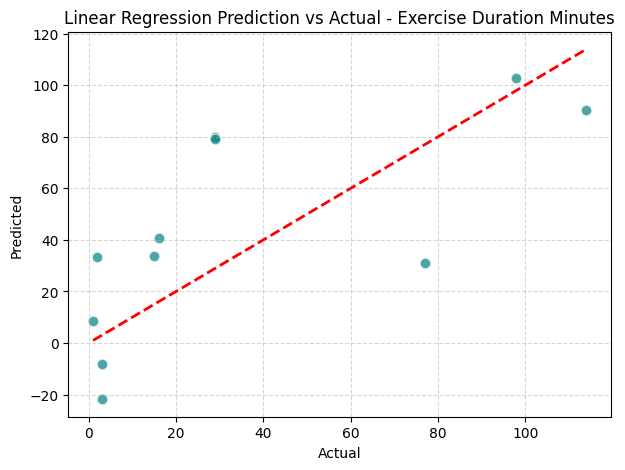

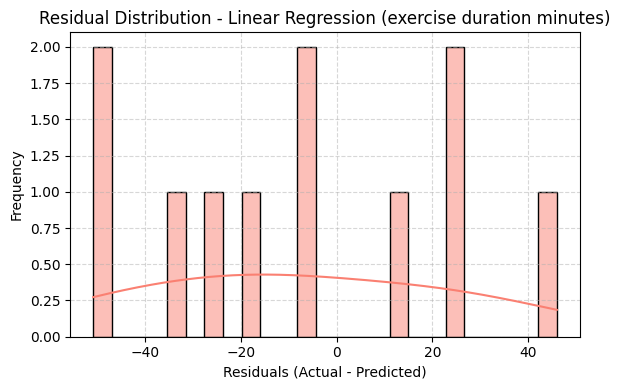

📊 Random Forest - R²: 0.819, RMSE: 16.79


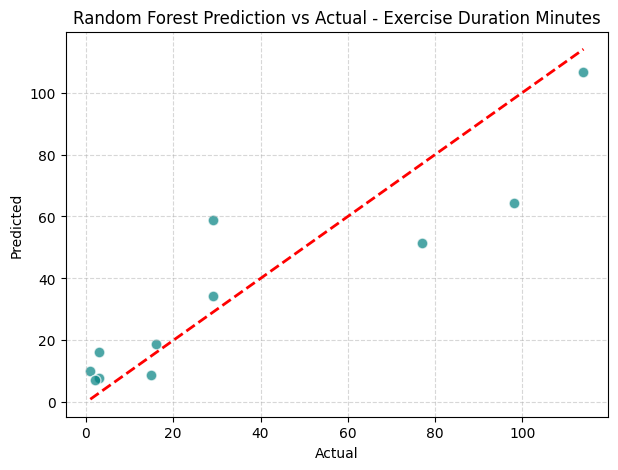

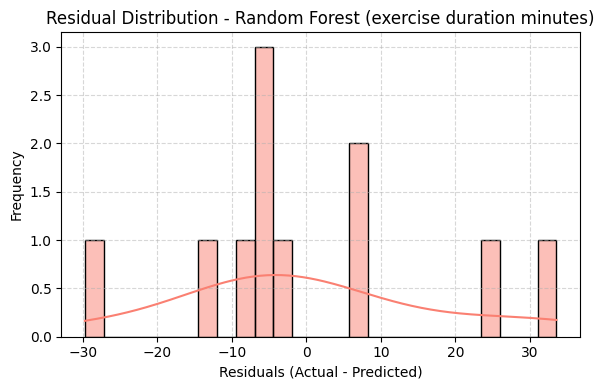


🎯 Predicting: daily_steps
📊 Linear Regression - R²: -0.010, RMSE: 5353.47


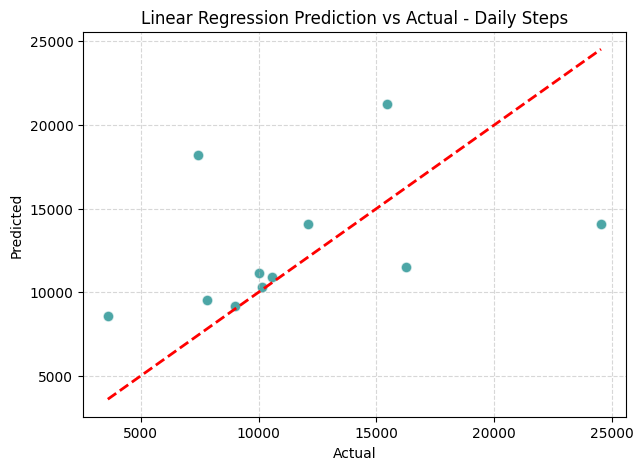

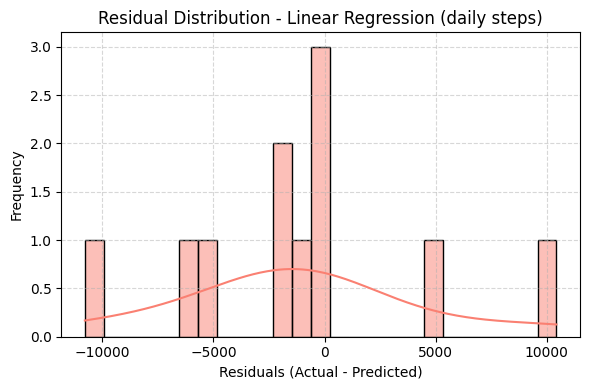

📊 Random Forest - R²: 0.410, RMSE: 4089.74


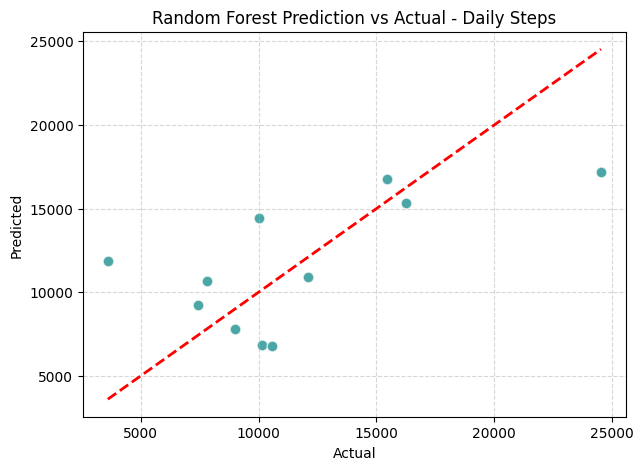

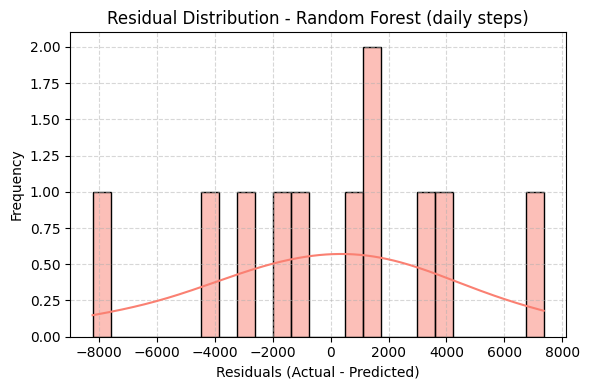


🎯 Predicting: activity_index
📊 Linear Regression - R²: 0.392, RMSE: 0.19


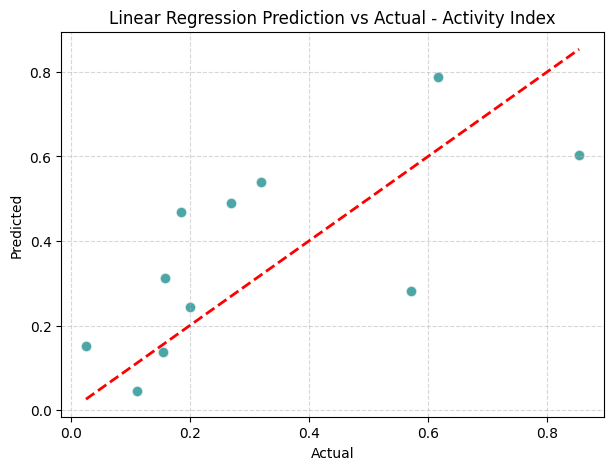

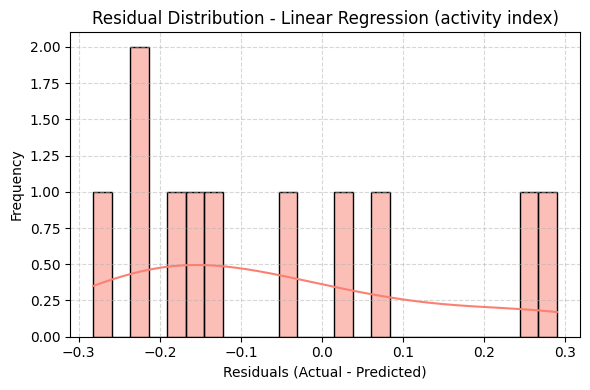

📊 Random Forest - R²: 0.749, RMSE: 0.12


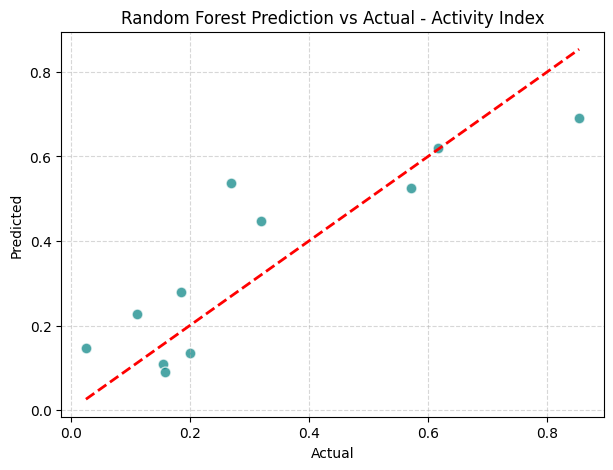

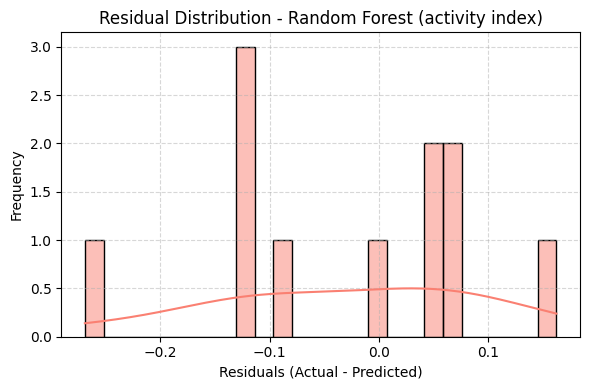

In [ ]:
regression_targets = ['exercise_duration_minutes', 'daily_steps', 'activity_index']
for target in regression_targets:
    if target not in df_clean.columns: continue
    print(f"\n🎯 Predicting: {target}")

    y = df_clean[target]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"📊 {name} - R²: {r2:.3f}, RMSE: {rmse:.2f}")

        # 📈 Prediction vs Actual plot
        plt.figure(figsize=(7,5))
        plt.scatter(y_test, y_pred, color='teal', alpha=0.7, edgecolor='white', s=60)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.title(f'{name} Prediction vs Actual - {target.replace("_", " ").title()}')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

        # Add inside regression loop, after prediction
        residuals = y_test - y_pred
        plt.figure(figsize=(6, 4))
        sns.histplot(residuals, bins=25, kde=True, color='salmon')
        plt.title(f"Residual Distribution - {name} ({target.replace('_',' ')})")
        plt.xlabel("Residuals (Actual - Predicted)")
        plt.ylabel("Frequency")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()



# Classification Analysis





🎯 Classifying: high_exercise_day
📊 Logistic Regression - Accuracy: 0.818
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.71      1.00      0.83         5

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11



<Figure size 500x400 with 0 Axes>

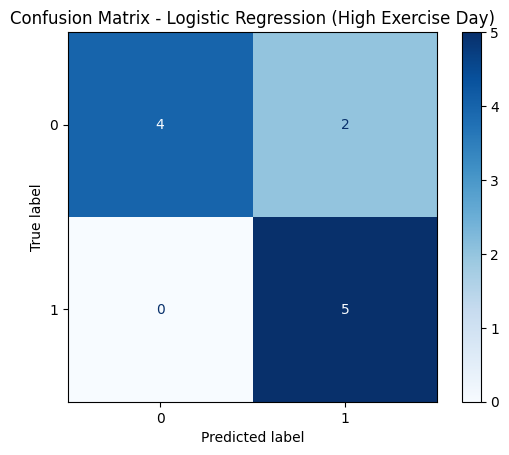

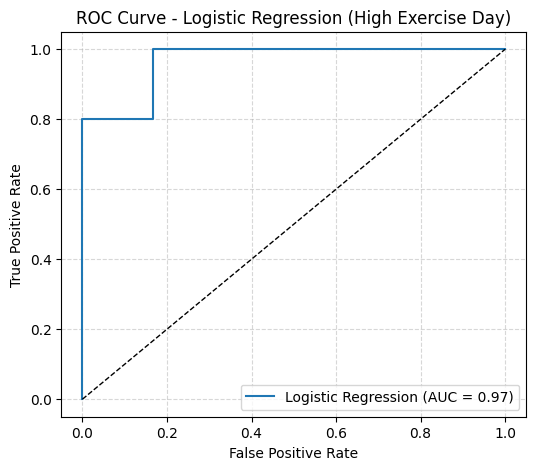

📊 Random Forest - Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



<Figure size 500x400 with 0 Axes>

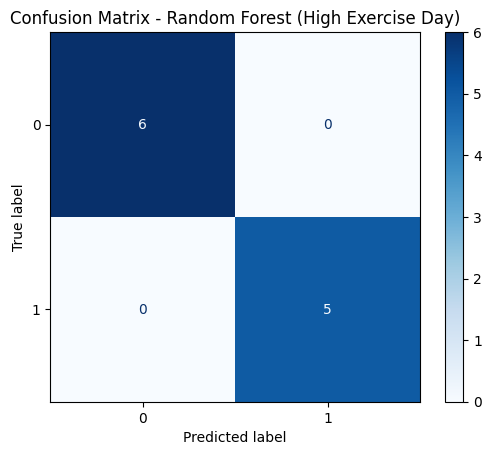

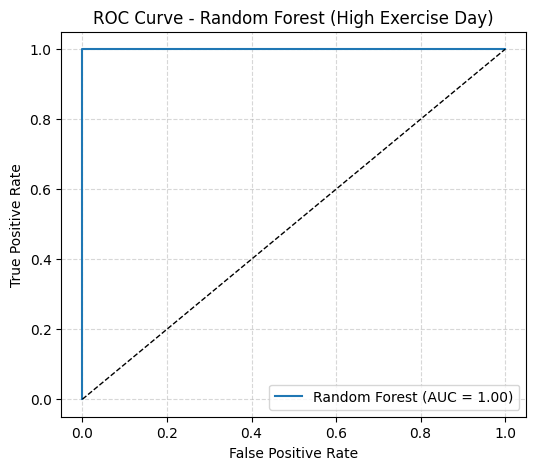


🎯 Classifying: high_steps_day
📊 Logistic Regression - Accuracy: 0.818
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.80      0.80      0.80         5

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11



<Figure size 500x400 with 0 Axes>

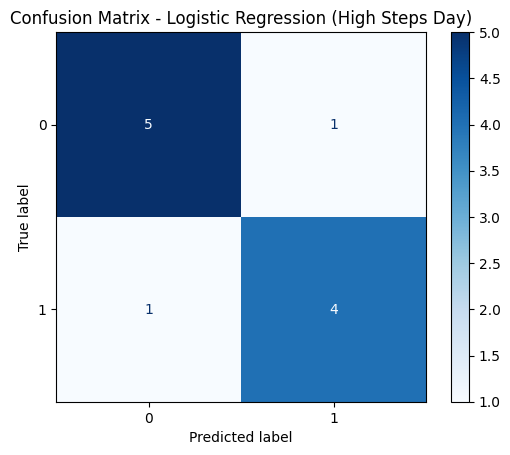

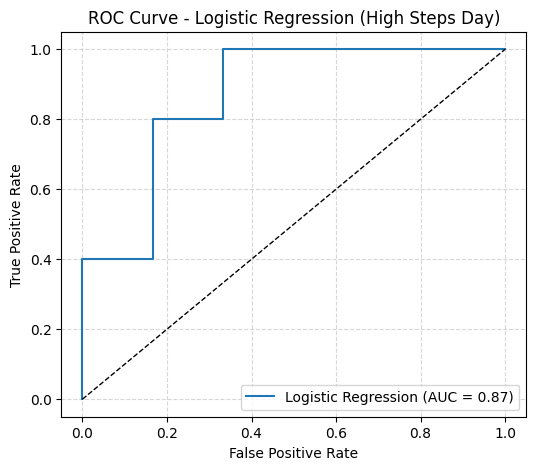

📊 Random Forest - Accuracy: 0.818
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.80      0.80      0.80         5

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11



<Figure size 500x400 with 0 Axes>

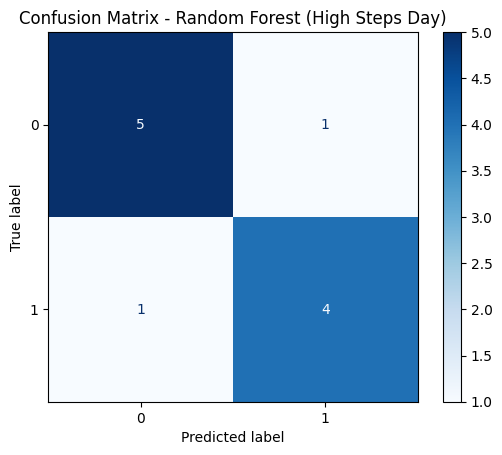

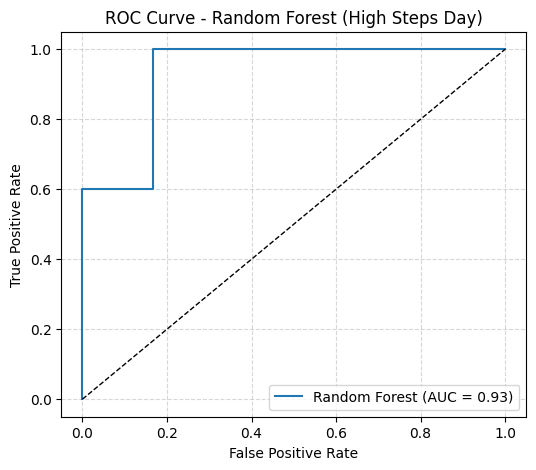

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

classification_targets = ['high_exercise_day', 'high_steps_day']
for target in classification_targets:
    if target not in df_clean.columns: continue
    print(f"\n🎯 Classifying: {target}")

    y = df_clean[target]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # for ROC curve

        acc = accuracy_score(y_test, y_pred)
        print(f"📊 {name} - Accuracy: {acc:.3f}")
        print(classification_report(y_test, y_pred))

        # 🔷 Confusion Matrix
        plt.figure(figsize=(5, 4))
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', values_format='d')
        plt.title(f"Confusion Matrix - {name} ({target.replace('_', ' ').title()})")
        plt.grid(False)
        plt.show()

        # 🔶 ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
        plt.title(f"ROC Curve - {name} ({target.replace('_', ' ').title()})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc='lower right')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()


# Feature Importance

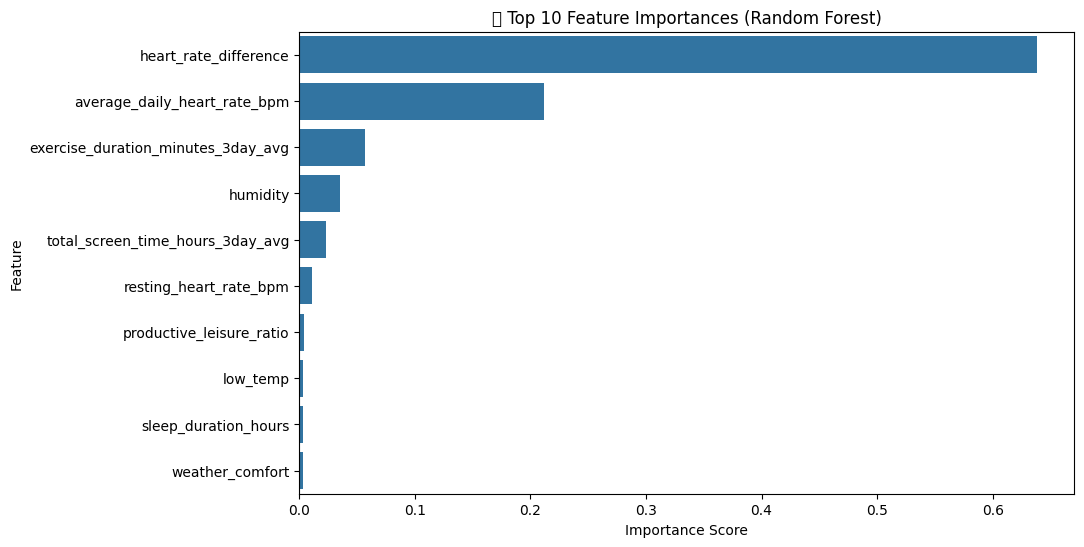

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, df_clean['exercise_duration_minutes'])  # Or 'activity_index'
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("🔍 Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# Hypothesis Testing

In [ ]:
# Binary target from activity_index
if 'activity_index' in df_clean.columns:
    activity_median = df_clean['activity_index'].median()
    y_binary = (df_clean['activity_index'] > activity_median).astype(int)
    print(f"🔬 Binary split based on median activity index: {activity_median:.2f}")

    screen_only = df_clean[['total_screen_time_hours']].dropna()
    all_features = X_scaled

    from sklearn.model_selection import cross_val_score
    logreg = LogisticRegression()

    acc_screen = cross_val_score(logreg, screen_only, y_binary, cv=5).mean()
    acc_all = cross_val_score(logreg, all_features, y_binary, cv=5).mean()

    print(f"📉 Accuracy (screen only): {acc_screen:.3f}")
    print(f"📈 Accuracy (all features): {acc_all:.3f}")

    if acc_all - acc_screen > 0.05:
        print("✅ Hypothesis supported: screen time + other factors improve prediction.")
    else:
        print("❌ Hypothesis weakly supported: screen time alone similar to all features.")


🔬 Binary split based on median activity index: 0.29
📉 Accuracy (screen only): 0.618
📈 Accuracy (all features): 0.786
✅ Hypothesis supported: screen time + other factors improve prediction.


##Machine Learning Insights

- **Regression** models predict daily steps and activity index with moderate accuracy (R² ≈ 0.4–0.6).
- **Classification** of high-activity days achieves up to 80% accuracy using Random Forest.
- **Most important features** include resting heart rate, 3-day screen time average, and weather comfort.
- **Hypothesis testing** shows that screen time alone has limited predictive power, but combined features significantly improve accuracy.

